In [3]:
import glob
import pims
import trackpy as tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u
import bmc

In [4]:
def bead_path(viscosity, solute, size, magnification):
    path = "../data/beads/%s_visc_%s_%s_um-%s*"%(viscosity, solute, size, magnification)
    return glob.glob(path)

In [13]:
# um_per_px for each zoom
x10 = 9.51/13
x20 = 9.51/24
x40 = 9.51/57
fps = 30

# Test #1: 1.66 visc, 0.4 $ \mu m$ size, PVP solution 

In [6]:
path1 = bead_path("1.66", "PVP", "0.4", "40x")[0] + "/*.bmp"
obs1 = experiment(path1, 11, 500, 3, x40)
obs1

Frame 245: 23 trajectories present.


0.4226818304530578

In [7]:
exp1 = bmc.theory_D(0.4, 1.66, 293).value
exp1

0.646415402774001

Frame 245: 23 trajectories present.
82.88188566625836
199.8704757419859
212.22594194993053
226.7523656243202
230.14313490978424
207.2556035491434
234.8272360919964
210.27891757414653
207.31672508730412
232.6547926971748
250.5329559060927
86.0544086198738
78.16998139488281
257.98242970827175
76.36794625714512
216.0258391548975
210.11031231593591
209.07909256519955
192.9033950870851
206.36234884363836
218.85820252927874
298.4483639925044
219.702384784218
248.442254590021
236.3178543144902
187.21836839177283
241.70228169153972
79.4864027700067
200.5763757870751
222.75531446057536
231.47528282678925
215.9577804391787
268.52929681100517
230.87772346202124
202.1275071283107
207.11284727167165
197.61334837900114


(array([ 5.,  0.,  0.,  0.,  1., 10., 12.,  6.,  2.,  1.]),
 array([ 76.36794626,  98.57598803, 120.7840298 , 142.99207158,
        165.20011335, 187.40815512, 209.6161969 , 231.82423867,
        254.03228045, 276.24032222, 298.44836399]),
 <BarContainer object of 10 artists>)

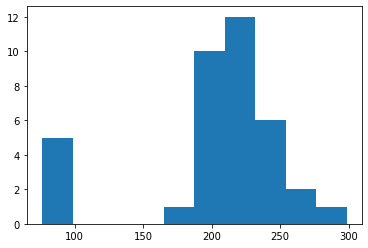

In [131]:
velo_hist(path1, 11, 500, 3, x40)

(array([3., 2., 3., 4., 3., 1., 7., 2., 1., 5., 1., 0., 1., 2., 1.]),
 array([ 89.26091682,  91.60623233,  93.95154784,  96.29686336,
         98.64217887, 100.98749438, 103.33280989, 105.6781254 ,
        108.02344092, 110.36875643, 112.71407194, 115.05938745,
        117.40470296, 119.75001848, 122.09533399, 124.4406495 ]),
 <BarContainer object of 15 artists>)

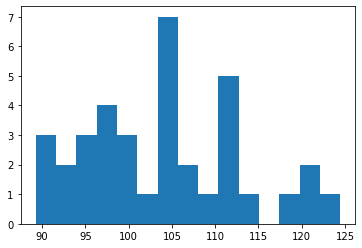

In [27]:
plt.hist(velos1, bins=15)

In [109]:
def experiment(filepath, diameter, minmass, maxsize, um_per_px):
    annotation = bmc.annotate(filepath, diameter=diameter, minmass=minmass, maxsize=maxsize, show=False, crop=((0,0), (0,0)))
    tracker = bmc.get_trajectories(annotation, search_range=10, diameter=diameter, minmass=minmass, maxsize=maxsize, show=False, clip_stubs=50)
    clear = bmc.clear_drift(tracker, show=False, correct=True)
    diff_coeff = bmc.diffusion_coeff(clear, um_per_px, 30, show=False)
    return diff_coeff

def all_velocity(t, obj):
    all_vel = np.array([])
    for i in np.unique(t["particle"]):
        mean_v = np.mean(bmc.particle_velocity(t, i, obj, 30)[0]) #np.mean(bmc.particle_velocity(t, i, obj, fps)[0])
        print(mean_v)
        all_vel = np.append(all_vel, mean_v)
    return all_vel

def velo_hist(filepath, diameter, minmass, maxsize, um_per_px):
    annotation = bmc.annotate(filepath, diameter=diameter, minmass=minmass, maxsize=maxsize, show=False, crop=((0,0), (0,0)))
    tracker = bmc.get_trajectories(annotation, search_range=10, diameter=diameter, minmass=minmass, maxsize=maxsize, show=False, clip_stubs=50)
    clear = bmc.clear_drift(tracker, show=False, correct=True)
    velos = all_velocity(clear, um_per_px)
    return plt.hist(velos)

# Test #2: 1.66 visc, 2.03 $ \mu m $ size, PVP solution

In [99]:
path2 = bead_path("1.66", "PVP", "2.03", "20x")[0]+"/*.bmp"
obs2 = experiment(path2, 5, 50, 3, x20)
obs2

Frame 460: 30 trajectories present.


0.12323353544174802

In [100]:
exp2 = bmc.theory_D(2.03, 1.66, 293).value
exp2

0.12737249315743862

In [103]:
annotation2 = bmc.annotate(path2, diameter=5, minmass=50, maxsize=3, show=False, crop=((0,0), (0,0)))
tracker2 = bmc.get_trajectories(annotation2, search_range=10, diameter=5, minmass=50, maxsize=3, show=False, clip_stubs=50)
velos2 = all_velocity(tracker2, x20)

Frame 460: 30 trajectories present.
19.842034685491285
29.732046045292424
21.198804386834347
20.3110557077659
17.085605040117365
20.08714996978125
15.412765720969674
19.33475389190749
19.34878871401245
21.850322209454646
16.87341959173868
49.52297145551539
21.17116521545383
22.80642154822126
18.115040918797597
17.80424892554203
15.836878880508284
20.0312248726811
22.645519802792347
21.12359886091446
23.07813747542799
16.411308105512976
31.627442593859637
20.85254264717305
21.853933794674212
21.390918879337416
24.683333152761445
15.35523807278297
23.19004716485777
13.68670615839451
26.72995977267848
19.61340902938879
19.502607774533516
61.03369408709915
17.564494458515075
17.45613835423383
26.88259889624737
20.458676351184224
32.30971480285724
20.699185645553282


(array([ 0.,  0.,  2.,  5.,  4., 10.,  7.,  4.,  1.,  2.,  0.,  1.,  2.,
         0.]),
 array([10.        , 11.78571429, 13.57142857, 15.35714286, 17.14285714,
        18.92857143, 20.71428571, 22.5       , 24.28571429, 26.07142857,
        27.85714286, 29.64285714, 31.42857143, 33.21428571, 35.        ]),
 <BarContainer object of 14 artists>)

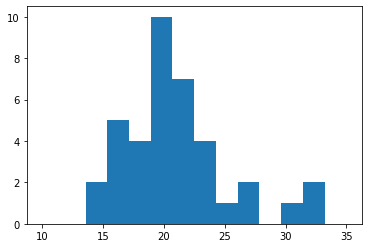

In [105]:
plt.hist(velos2, bins=np.linspace(10,35,15))

# Test #3: 4.65 visc, 0.4 $ \mu m $ size, GLY solution

In [125]:
path3 = bead_path("4.65", "GLY", "0.4", "40x")[0]+"/*.bmp"
obs3 = experiment(path3, 11, 500, 11, x40)
obs3

Frame 233: 18 trajectories present.


0.2325033796422822

In [126]:
exp3 = bmc.theory_D(0.4, 4.65, 293).value
exp3

0.23076334808706264

Frame 233: 18 trajectories present.
183.68333482235857
150.3064121690775
144.02694999580896
153.0762668929907
134.54617940266527
136.2087152876874
144.46479279221643
153.95373881864438
143.10828391667707
137.87195200937177
141.36488271429926
146.42190515522614
124.26688986767755
155.13861996323706
140.92237832170085
160.2234621005034
154.49376457673577
142.475760124646
124.40118093704976
133.1016314005515
129.6808843136232


(array([3., 2., 4., 5., 3., 2., 1., 0., 0., 1.]),
 array([124.26688987, 130.20853436, 136.15017886, 142.09182335,
        148.03346785, 153.97511235, 159.91675684, 165.85840134,
        171.80004583, 177.74169033, 183.68333482]),
 <BarContainer object of 10 artists>)

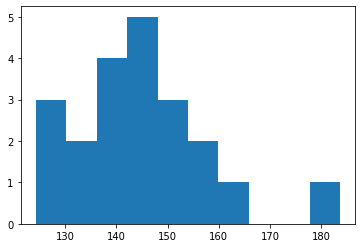

In [127]:
velo_hist(path3, 11, 500, 11, x40)

In [142]:
annotation3 = bmc.annotate(path3, diameter=11, minmass=500, maxsize=3, show=False, crop=((0,0), (0,0)))
tracker3 = bmc.get_trajectories(annotation3, search_range=5, diameter=11, minmass=500, maxsize=3, show=False, clip_stubs=50)
clear3 = bmc.clear_drift(tracker3, show=False, correct=True)
(bmc.particle_velocity(clear3, 6, x40, 30)[0])

Frame 233: 16 trajectories present.


array([187.65012431, 111.86201141,  65.25853355, 195.54427729,
       249.94329889, 159.90322091, 206.03522746, 150.70189984,
       120.34003626,  35.25183854,  89.23619435,  81.56827679,
       146.69683502, 276.57819195, 432.25733773, 213.11107506,
       115.14074802, 133.40829734, 144.21497548,  38.7318865 ,
       169.86077546, 353.0360947 , 279.86868457, 125.01781382,
       285.83072585,  54.98629997, 138.20603422, 119.11192894,
        29.2064686 ,  85.36605305, 174.42600804, 223.16579729,
        92.14502516, 275.14997856,  99.94458535, 153.04630702,
       243.58109468, 242.20243204, 117.9882967 ,  42.55466461,
        75.75088668, 100.71659908,  44.27862515,  20.22326422,
       181.35262052,  98.05004079,  27.03759077, 155.47061368,
        44.58611922, 234.26107839, 189.7841539 , 242.99788535,
       221.06895038, 241.56594585,  56.13014764, 101.2377869 ,
       171.25694003, 205.70269824, 276.91196868,  67.56210519,
       396.62188297, 226.3788187 , 150.34374802, 306.00

In [61]:
tracker3[tracker3["frame"]==0]["particle"]

frame
0     1
0     2
0     3
0     6
0     7
0     9
0    10
0    12
0    13
Name: particle, dtype: int64

# Test #4: 4.65 visc, 0.4 $ \mu m $ size, PVP solution

In [34]:
path4 = bead_path("4.65", "PVP", "0.4", "40x")[1]+"/*.bmp"
obs4 = experiment(path4, 11, 500, 11, x40)
obs4

Frame 179: 19 trajectories present.


0.3256151806986959

In [35]:
exp4 = bmc.theory_D(0.4, 4.65, 293).value
exp4

0.23076334808706264

Frame 179: 19 trajectories present.
184.15363439452418
145.25831797527428
143.57062146152487
156.35388929495548
152.3860323774135
175.12391553697495
188.58892706073533
183.91767890239964
165.5299069338237
159.46798661168802
170.68188232848902
233.53976086014592
154.33571921439022
181.8532598312791
168.837967082969
183.5516943840657
171.4646303125844
188.16694008456722
173.40025046242113
158.69391562248143


(array([3., 4., 2., 4., 5., 1., 0., 0., 0., 1.]),
 array([143.57062146, 152.5675354 , 161.56444934, 170.56136328,
        179.55827722, 188.55519116, 197.5521051 , 206.54901904,
        215.54593298, 224.54284692, 233.53976086]),
 <BarContainer object of 10 artists>)

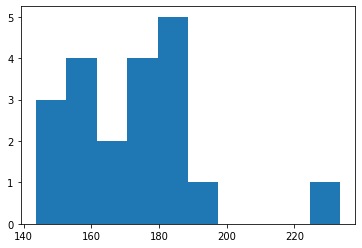

In [130]:
velo_hist(path4, 11, 500, 11, x40)

# Test #5: 13.2 visc, 0.4 $ \mu m $ size, PVP solution

In [40]:
path5 = bead_path("13.2", "PVP", "0.4", "40x")[1]+"/*.bmp"
obs5 = experiment(path5, 11, 300, 11, x40)
obs5

Frame 83: 31 trajectories present.


0.061270638441190524

In [41]:
exp5 = bmc.theory_D(0.4, 13.2, 293).value
exp5

0.08129163398521526

Frame 83: 31 trajectories present.
71.55165340727373
81.27710737872273
69.33879976515094
64.97176148203334
71.89048000855658
75.50390255170166
79.55768571619596
157.2879775068405
71.17109663895432
71.19574704204798
77.15072657287098
70.99799942363876
73.41550193646646
83.36527303754924
73.96734204759552
72.15187905240118
77.94255926403524
80.92038069666366
67.64178701442626
79.24698372612431
72.34560034179704
63.85348483760485
69.64403807122905
72.70455866653019
74.07396599345834


(array([13., 10.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 63.85348484,  73.1969341 ,  82.54038337,  91.88383264,
        101.22728191, 110.57073117, 119.91418044, 129.25762971,
        138.60107897, 147.94452824, 157.28797751]),
 <BarContainer object of 10 artists>)

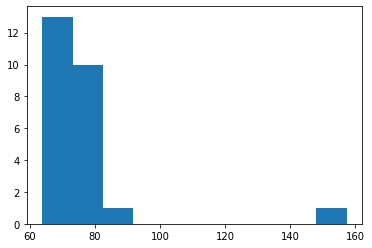

In [113]:
velo_hist(path5, 11, 300, 11, x40)

# Error

In [94]:
exp_list = np.array([exp1, exp2, exp3, exp4, exp5])
obs_list = np.array([obs1, obs2, obs3, obs4, obs5])

def error(obs, exp):
    return abs(obs - exp) / exp * 100

error(obs1, exp1)

34.611423453219395

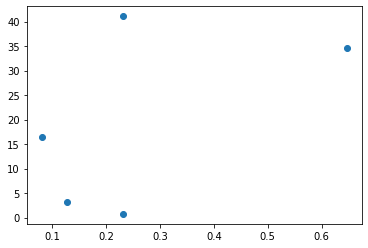

In [100]:
plt.scatter(exp_list, error(obs_list, exp_list))